In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/cmpt889/a2"

import sys
sys.path.insert(1, path_prefix)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np


In [ ]:
!ls /content/gdrive/MyDrive/cmpt889/a2

 a2.ipynb		   ' df1_cluster.gsheet'	   Mortgage_Holders_Data_P2.csv
' cluster_summary.csv'	    DSB_A2_T10.ipynb		   Mortgage_Holders_Data_P2.gsheet
' cluster_summary.gsheet'   DSB_A2_T20.ipynb		  'predicted_run_off_(random_forest).csv'
' df1_cluster.csv'	    Mortgage_Holders_Data.csv
 df1_cluster.csv	    Mortgage_Holders_Data.gsheet


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/cmpt889/a2/Mortgage_Holders_Data.csv', index_col = False)

NameError: ignored

In [ ]:
df1.info()
output_df1 = df1.copy()
test_df1 = df1.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13821 entries, 0 to 13820
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13821 non-null  int64  
 1   Beacon_Score              13821 non-null  int64  
 2   Mortgage_Balance          13821 non-null  float64
 3   Services                  13821 non-null  int64  
 4   Avg_Monthly_Transactions  13821 non-null  int64  
 5   Has_Payroll               13821 non-null  int64  
 6   Has_Investment            13821 non-null  int64  
 7   Has_Visa                  13821 non-null  int64  
 8   VISA_balance              13821 non-null  float64
 9   Has_Deposit               13821 non-null  int64  
 10  Not_Mortgage_Balance      13821 non-null  float64
 11  Income                    981 non-null    float64
 12  Age                       13821 non-null  int64  
 13  Gender                    13821 non-null  object 
 14  Sector

In [ ]:
test_df1.shape[0]

13821

**Clean the data**

Drop Income and VISA_balance columns, they have too many null or 0 values




In [ ]:
test_df1 = test_df1.drop(columns=['Income', 'VISA_balance'])

In [ ]:
num_rows= test_df1.shape[0]
# Assuming 'df' is your DataFrame
num_rows_beacon_zero = (test_df1['Beacon_Score'] == 0).sum()

print(num_rows_beacon_zero)
print(num_rows_beacon_zero/ num_rows )


296
0.021416684755082845


Add column Zero_Beacon_Score

In [ ]:
test_df1['Zero_Beacon_Score'] = np.where(test_df1['Beacon_Score'] == 0, 1, 0)

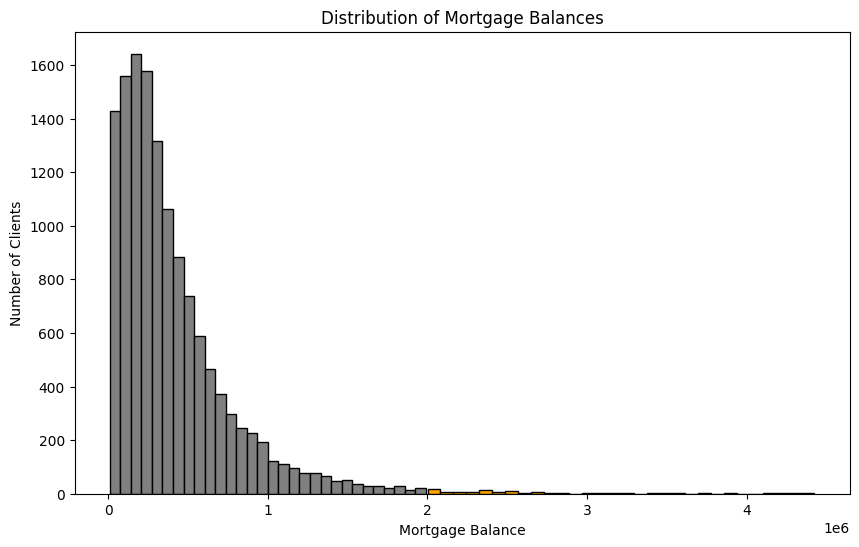

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the rows where Zero_Beacon_Score is 1
filtered_df = test_df1[test_df1['Zero_Beacon_Score'] != 1]

# Define the two groups based on the Mortgage_Balance after filtering
below_2_million = filtered_df['Mortgage_Balance'][filtered_df['Mortgage_Balance'] < 2e6]
between_2_and_5_million = filtered_df['Mortgage_Balance'][(filtered_df['Mortgage_Balance'] >= 2e6) & (filtered_df['Mortgage_Balance'] <= 5e6)]

# Create the histogram
plt.figure(figsize=(10, 6))

# Plot for balances below 2 million in grey
plt.hist(below_2_million, bins=30, color='grey', edgecolor='black', label='Below 2 Million')

# Plot for balances between 2 and 5 million in orange
plt.hist(between_2_and_5_million, bins=30, color='orange', edgecolor='black', label='Between 2 and 5 Million')

# Labeling
plt.xlabel('Mortgage Balance')
plt.ylabel('Number of Clients')
plt.title('Distribution of Mortgage Balances')
plt.show()


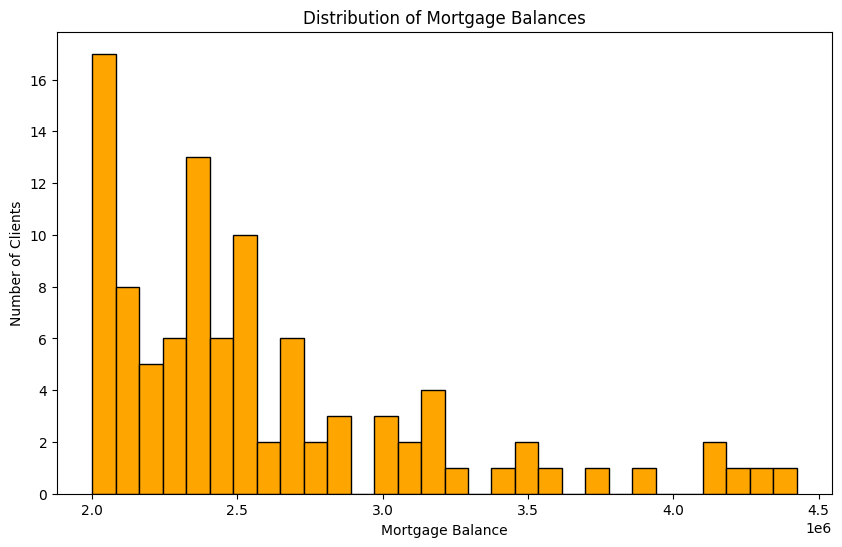

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))


# Plot for balances between 2 and 5 million in orange
plt.hist(between_2_and_5_million, bins=30, color='orange', edgecolor='black')

# Labeling
plt.xlabel('Mortgage Balance')
plt.ylabel('Number of Clients')
plt.title('Distribution of Mortgage Balances')
plt.show()

In [ ]:
filtered_df['client_label'] = filtered_df.apply(lambda x: 'Z' if 1 < x['Beacon_Score'] < 640 else '', axis=1)

<ipython-input-149-21d7a5625b43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['client_label'] = filtered_df.apply(lambda x: 'Z' if 1 < x['Beacon_Score'] < 640 else '', axis=1)


In [ ]:
filtered_df.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,City,TermInMonths,TermToMaturity,NumberOfParties,InterestRate,Type,not mortgage lending,deposit,Zero_Beacon_Score,client_label
0,4338,814,136663.31,6,300,1,0,1,1,18663.60,...,WHITE ROCK ...,60.0,9.0,2.0,0.0269,FixedTFixedR,7327.090767,11336.50923,0,
1,1388,731,820868.89,4,300,1,0,0,1,91232.15,...,NORTH VANCOUVER ...,60.0,15.0,2.0,0.0370,FixedTVariableR,219.275478,91012.87452,0,
2,141,805,255771.87,10,300,1,1,1,1,519072.14,...,PORT COQUITLAM ...,60.0,10.0,2.0,0.0269,FixedTFixedR,399173.555600,119898.58440,0,
3,6854,782,434660.72,8,300,1,1,0,1,312789.90,...,VANCOUVER ...,60.0,25.0,1.0,0.0289,FixedTFixedR,106300.125700,206489.77430,0,
4,5998,759,275806.17,7,300,1,0,1,1,164574.25,...,MAPLE RIDGE ...,60.0,8.0,2.0,0.0279,FixedTFixedR,23036.264000,141537.98600,0,


In [ ]:
num_filtered = filtered_df.shape[0]
num_filtered

13525

In [ ]:
high_Mortgage_Balance = (filtered_df['Mortgage_Balance'] >= 1e6).sum()
high_Mortgage_Balance

927

In [ ]:
high_Mortgage_Balance/num_filtered

0.06853974121996304

Ranking the Customers accorind to Mortgage Balance

In [ ]:
df_sorted = filtered_df.sort_values(by='Mortgage_Balance', ascending=False)


In [ ]:
total_mortgage_balance = df_sorted['Mortgage_Balance'].sum()

print(f"Total Mortgage Balance: ${total_mortgage_balance:,.2f}")


Total Mortgage Balance: $5,535,965,368.97


In [ ]:
df_sorted['Cumulative_Balance'] = df_sorted['Mortgage_Balance'].cumsum()

In [ ]:
df_sorted['Cumulative_percentage'] = (df_sorted['Cumulative_Balance'] / total_mortgage_balance) * 100


In [ ]:
print(df_sorted.head())

         ID  Beacon_Score  Mortgage_Balance  Services  \
5912   5327           711        5114784.75         6   
12418  4075           728        4424676.07         3   
1089    851           762        4266438.67         4   
11469  7151           685        4189826.60         3   
3018   7341           803        4166996.69         7   

       Avg_Monthly_Transactions  Has_Payroll  Has_Investment  Has_Visa  \
5912                         20            0               1         1   
12418                         0            0               0         0   
1089                         98            0               0         1   
11469                         1            0               0         0   
3018                         50            0               1         0   

       Has_Deposit  Not_Mortgage_Balance  ...  TermToMaturity NumberOfParties  \
5912             1             550329.97  ...            15.5            1.75   
12418            1             478729.86  ...     

In [ ]:

# Determine number of customers representing 10%
num_customers_10_percent = int(0.10 * len(df_sorted))

# Check the cumulative percentage at that point
cumulative_percent_at_10 = df_sorted.iloc[num_customers_10_percent]['Cumulative_percentage']


breakpoints = [(0.10, 20), (0.20, 40), (0.30, 60), (0.40, 70)]
for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        print(f"The top {bp[0]*100:.0f}% of customers contribute {cumulative_percent_at_bp:.2f}% of the total mortgage balance.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total mortgage balance.")


The top 10% of customers contribute 31.72% of the total mortgage balance.
The top 20% of customers contribute 49.29% of the total mortgage balance.
The top 30% of customers contribute 62.35% of the total mortgage balance.
The top 40% of customers contribute 72.67% of the total mortgage balance.


In [ ]:
Q1 = df_sorted['Mortgage_Balance'].quantile(0.25)
Q3 = df_sorted['Mortgage_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Create a new column to mark the outliers
df_sorted['Outlier_Mark'] = ['Outlier' if x > upper_bound else 'Inlier' for x in df_sorted['Mortgage_Balance']]
num_Outliers = (df_sorted['Outlier_Mark'] == 'Outlier').sum()


In [ ]:
outlier_sum = df_sorted[df_sorted['Outlier_Mark'] == 'Outlier']['Mortgage_Balance'].sum()
print(outlier_sum)

1182075674.4299998


In [ ]:
print(outlier_sum/ total_mortgage_balance)

0.21352656594561253


In [ ]:

# Determine number of customers representing 10%
num_customers_10_percent = int(0.10 * len(df_sorted))

# Check the cumulative percentage at that point
cumulative_percent_at_10 = df_sorted.iloc[num_customers_10_percent]['Cumulative_percentage']


breakpoints = [(0.10, 20), (0.20, 40), (0.30, 60), (0.40, 70)]
for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        print(f"The top {bp[0]*100:.0f}% of customers contribute {cumulative_percent_at_bp:.2f}% of the total mortgage balance.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total mortgage balance.")


The top 10% of customers contribute 31.72% of the total mortgage balance.
The top 20% of customers contribute 49.29% of the total mortgage balance.
The top 30% of customers contribute 62.35% of the total mortgage balance.
The top 40% of customers contribute 72.67% of the total mortgage balance.


In [ ]:
df_sorted.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,NumberOfParties,InterestRate,Type,not mortgage lending,deposit,Zero_Beacon_Score,client_label,Cumulative_Balance,Cumulative_percentage,Outlier_Mark
5912,5327,711,5114784.75,6,20,0,1,1,1,550329.97,...,1.75,0.0390,FixedTVariableR,10178.85638,5.401511e+05,0,,5114784.75,0.092392,Outlier
12418,4075,728,4424676.07,3,0,0,0,0,1,478729.86,...,2.00,0.0345,FixedTVariableR,420102.72820,5.862713e+04,0,,9539460.82,0.172318,Outlier
1089,851,762,4266438.67,4,98,0,0,1,1,2134965.25,...,2.00,0.0345,FixedTVariableR,719377.52970,1.415588e+06,0,,13805899.49,0.249386,Outlier
11469,7151,685,4189826.60,3,1,0,0,0,1,237941.84,...,3.00,0.0269,FixedTFixedR,180903.37040,5.703847e+04,0,,17995726.09,0.325069,Outlier
3018,7341,803,4166996.69,7,50,0,1,0,1,293172.38,...,2.00,0.0335,FixedTVariableR,197078.73360,9.609365e+04,0,,22162722.78,0.400341,Outlier


In [ ]:
# Assigning label Z
df_sorted.loc[(df_sorted['Beacon_Score'] < 640) & (df_sorted['Beacon_Score'] > 1), 'client_label'] = 'Z'
df_sorted.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,NumberOfParties,InterestRate,Type,not mortgage lending,deposit,Zero_Beacon_Score,client_label,Cumulative_Balance,Cumulative_percentage,Outlier_Mark
5912,5327,711,5114784.75,6,20,0,1,1,1,550329.97,...,1.75,0.0390,FixedTVariableR,10178.85638,5.401511e+05,0,,5114784.75,0.092392,Outlier
12418,4075,728,4424676.07,3,0,0,0,0,1,478729.86,...,2.00,0.0345,FixedTVariableR,420102.72820,5.862713e+04,0,,9539460.82,0.172318,Outlier
1089,851,762,4266438.67,4,98,0,0,1,1,2134965.25,...,2.00,0.0345,FixedTVariableR,719377.52970,1.415588e+06,0,,13805899.49,0.249386,Outlier
11469,7151,685,4189826.60,3,1,0,0,0,1,237941.84,...,3.00,0.0269,FixedTFixedR,180903.37040,5.703847e+04,0,,17995726.09,0.325069,Outlier
3018,7341,803,4166996.69,7,50,0,1,0,1,293172.38,...,2.00,0.0335,FixedTVariableR,197078.73360,9.609365e+04,0,,22162722.78,0.400341,Outlier


In [ ]:
df_sorted['client_label'].value_counts()

     12797
Z      728
Name: client_label, dtype: int64

In [ ]:
len(df_sorted[df_sorted['client_label'].isnull() | (df_sorted['client_label'] == '')])

12797

In [ ]:
top_n_entries = [(0.30, 20)]

In [ ]:
#Assigning label A
breakpoints = top_n_entries

for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        filtered_df = df_sorted[df_sorted['client_label'].isnull() | (df_sorted['client_label'] == '')]
        filtered_df = filtered_df[filtered_df['Cumulative_percentage'] <= cumulative_percent_at_bp]
        filtered_indices = filtered_df.index
        df_sorted.loc[filtered_indices, 'client_label'] = 'A'
        print(f"Assigned 'A' to entries where client_label is empty and Mortgage Balance falls in the top {bp[0]*100:.0f}% - {bp[1]}% cumulative range.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total mortgage balance.")

Assigned 'A' to entries where client_label is empty and Mortgage Balance falls in the top 30% - 20% cumulative range.


In [ ]:
df_sorted.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,NumberOfParties,InterestRate,Type,not mortgage lending,deposit,Zero_Beacon_Score,client_label,Cumulative_Balance,Cumulative_percentage,Outlier_Mark
5912,5327,711,5114784.75,6,20,0,1,1,1,550329.97,...,1.75,0.0390,FixedTVariableR,10178.85638,5.401511e+05,0,A,5114784.75,0.092392,Outlier
12418,4075,728,4424676.07,3,0,0,0,0,1,478729.86,...,2.00,0.0345,FixedTVariableR,420102.72820,5.862713e+04,0,A,9539460.82,0.172318,Outlier
1089,851,762,4266438.67,4,98,0,0,1,1,2134965.25,...,2.00,0.0345,FixedTVariableR,719377.52970,1.415588e+06,0,A,13805899.49,0.249386,Outlier
11469,7151,685,4189826.60,3,1,0,0,0,1,237941.84,...,3.00,0.0269,FixedTFixedR,180903.37040,5.703847e+04,0,A,17995726.09,0.325069,Outlier
3018,7341,803,4166996.69,7,50,0,1,0,1,293172.38,...,2.00,0.0335,FixedTVariableR,197078.73360,9.609365e+04,0,A,22162722.78,0.400341,Outlier


In [ ]:
df_sorted['client_label'].value_counts()

     8986
A    3811
Z     728
Name: client_label, dtype: int64

Ranking remaining customers on the basis of Not Mortgage Balance

In [ ]:
df_sorted = df_sorted.sort_values(by='Not_Mortgage_Balance', ascending=False)


In [ ]:
total_mortgage_balance = df_sorted['Not_Mortgage_Balance'].sum()

print(f"Total Not Mortgage Balance: ${total_mortgage_balance:,.2f}")


Total Not Mortgage Balance: $1,525,192,140.04


In [ ]:
df_sorted['Not_Cumulative_Balance'] = df_sorted['Not_Mortgage_Balance'].cumsum()

In [ ]:
df_sorted['Not_Cumulative_percentage'] = (df_sorted['Not_Cumulative_Balance'] / total_mortgage_balance) * 100

In [ ]:
#Assigning label B
breakpoints = top_n_entries

for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Not_Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        filtered_df = df_sorted[df_sorted['client_label'].isnull() | (df_sorted['client_label'] == '')]
        filtered_df = filtered_df[filtered_df['Not_Cumulative_percentage'] <= cumulative_percent_at_bp]
        filtered_indices = filtered_df.index
        df_sorted.loc[filtered_indices, 'client_label'] = 'B'
        print(f"Assigned 'B' to entries where client_label is empty and Not Mortgage Balance falls in the top {bp[0]*100:.0f}% - {bp[1]}% cumulative range.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total mortgage balance.")

Assigned 'B' to entries where client_label is empty and Not Mortgage Balance falls in the top 30% - 20% cumulative range.


In [ ]:
df_sorted['client_label'].value_counts()

     6453
A    3811
B    2533
Z     728
Name: client_label, dtype: int64

In [ ]:
df_sorted.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,Type,not mortgage lending,deposit,Zero_Beacon_Score,client_label,Cumulative_Balance,Cumulative_percentage,Outlier_Mark,Not_Cumulative_Balance,Not_Cumulative_percentage
8811,4659,803,187622.02,4,7,1,0,0,1,4664097.57,...,FixedTVariableR,3.489542e+06,1.174556e+06,0,B,5.115726e+09,92.408927,Inlier,4664097.57,0.305804
2221,2398,821,368637.07,7,66,1,0,1,1,2792139.05,...,FixedTVariableR,1.569645e+06,1.222494e+06,0,B,4.068810e+09,73.497741,Inlier,7456236.62,0.488872
5573,8221,806,256604.54,6,23,0,0,1,1,2746135.65,...,FixedTFixedR,2.717091e+06,2.904430e+04,0,B,4.745322e+09,85.718060,Inlier,10202372.27,0.668924
7658,4411,701,851143.53,6,11,1,0,1,1,2531599.23,...,FixedTVariableR,3.576112e+05,2.173988e+06,0,A,1.796232e+09,32.446583,Inlier,12733971.50,0.834909
2197,8205,737,546818.49,6,66,1,0,1,1,2418866.81,...,FixedTFixedR,2.274084e+06,1.447831e+05,0,A,3.040225e+09,54.917711,Inlier,15152838.31,0.993504


In [ ]:
df_sorted = df_sorted.sort_values(by='Avg_Monthly_Transactions', ascending=False)

In [ ]:
total_mortgage_balance = df_sorted['Avg_Monthly_Transactions'].sum()

print(f"Total Avg_Monthly_Transactions: {total_mortgage_balance:,.2f}")


Total Avg_Monthly_Transactions: 435,854.00


In [ ]:
df_sorted['Avg_Monthly_Transactions_Cumulative'] = df_sorted['Avg_Monthly_Transactions'].cumsum()

In [ ]:
df_sorted['Avg_Monthly_Transactions_Cumulative_percentage'] = (df_sorted['Avg_Monthly_Transactions_Cumulative'] / total_mortgage_balance) * 100

In [ ]:
#Assigning label C
breakpoints = top_n_entries

for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Avg_Monthly_Transactions_Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        filtered_df = df_sorted[df_sorted['client_label'].isnull() | (df_sorted['client_label'] == '')]
        filtered_df = filtered_df[filtered_df['Avg_Monthly_Transactions_Cumulative_percentage'] <= cumulative_percent_at_bp]
        filtered_indices = filtered_df.index
        df_sorted.loc[filtered_indices, 'client_label'] = 'C'
        print(f"Assigned 'C' to entries where client_label is empty and avg monthly transactions falls in the top {bp[0]*100:.0f}% - {bp[1]}% cumulative range.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total avg monthly transactions.")

Assigned 'C' to entries where client_label is empty and avg monthly transactions falls in the top 30% - 20% cumulative range.


In [ ]:
df_sorted['client_label'].value_counts()

     4424
A    3811
B    2533
C    2029
Z     728
Name: client_label, dtype: int64

In [ ]:
df_sorted = df_sorted.sort_values(by='Tenure_In_Months', ascending=False)

In [ ]:
total_mortgage_balance = df_sorted['Tenure_In_Months'].sum()

print(f"Total Tenure_In_Months: {total_mortgage_balance:,.2f}")


Total Tenure_In_Months: 2,750,431.00


In [ ]:
df_sorted['Tenure_In_Months_Cumulative'] = df_sorted['Tenure_In_Months'].cumsum()

In [ ]:
df_sorted['Tenure_In_Months_Cumulative_percentage'] = (df_sorted['Tenure_In_Months_Cumulative'] / total_mortgage_balance) * 100

In [ ]:
#Assigning label D
breakpoints = top_n_entries

for bp in breakpoints:
    num_customers = int(bp[0] * len(df_sorted))
    cumulative_percent_at_bp = df_sorted.iloc[num_customers]['Tenure_In_Months_Cumulative_percentage']
    if cumulative_percent_at_bp >= bp[1]:
        filtered_df = df_sorted[df_sorted['client_label'].isnull() | (df_sorted['client_label'] == '')]
        filtered_df = filtered_df[filtered_df['Tenure_In_Months_Cumulative_percentage'] <= cumulative_percent_at_bp]
        filtered_indices = filtered_df.index
        df_sorted.loc[filtered_indices, 'client_label'] = 'D'
        print(f"Assigned 'D' to entries where client_label is empty and Tenure_In_Months falls in the top {bp[0]*100:.0f}% - {bp[1]}% cumulative range.")
    else:
        print(f"The top {bp[0]*100:.0f}% of customers do not contribute {bp[1]}% of the total Tenure_In_Months.")

Assigned 'D' to entries where client_label is empty and Tenure_In_Months falls in the top 30% - 20% cumulative range.


In [ ]:
# Assigning label E
df_sorted.loc[(df_sorted['client_label'].isnull()) | (df_sorted['client_label'] == ''), 'client_label'] = 'E'
df_sorted.head()

,ID,Beacon_Score,Mortgage_Balance,Services,Avg_Monthly_Transactions,Has_Payroll,Has_Investment,Has_Visa,Has_Deposit,Not_Mortgage_Balance,...,client_label,Cumulative_Balance,Cumulative_percentage,Outlier_Mark,Not_Cumulative_Balance,Not_Cumulative_percentage,Avg_Monthly_Transactions_Cumulative,Avg_Monthly_Transactions_Cumulative_percentage,Tenure_In_Months_Cumulative,Tenure_In_Months_Cumulative_percentage
8255,11686,780,149518.55,5,9,1,0,0,1,85862.30,...,D,5.276992e+09,95.321978,Inlier,1.313628e+09,86.128684,421234,96.645666,800,0.029086
2526,1885,805,274181.42,6,59,1,0,1,1,19774.99,...,C,4.638119e+09,83.781580,Inlier,1.493537e+09,97.924508,266961,61.250098,1600,0.058173
4237,5464,783,263218.93,6,34,1,1,1,1,711607.38,...,B,4.705294e+09,84.994999,Inlier,2.910410e+08,19.082254,345394,79.245344,2400,0.087259
4057,1974,681,30845.67,5,36,1,0,1,1,232348.45,...,B,5.526895e+09,99.836149,Inlier,9.234677e+08,60.547631,339657,77.929077,3200,0.116345
5885,4369,575,10636.00,6,20,1,0,1,1,231353.88,...,Z,5.535821e+09,99.997384,Inlier,9.250888e+08,60.653919,388015,89.024077,4000,0.145432


In [ ]:
df_sorted['client_label'].value_counts()

A    3811
E    3313
B    2533
C    2029
D    1111
Z     728
Name: client_label, dtype: int64

In [ ]:
output_df =  pd.read_csv('/content/gdrive/MyDrive/cmpt889/a2/predicted_run_off_(random_forest).csv', index_col = False)